In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

#### Step 1: Prepare Dummy Data

In [4]:
# Simulate tokenized text data (Sequence of numbers)
data = torch.arange(1, 101).unsqueeze(1).float()  # Tokens 1 to 100
targets = data + 1  # Next token prediction task (like language modeling)

In [5]:
# Split data into small batches (Batch Size = 10)
dataset = TensorDataset(data, targets)
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)


#### Step 2: Define Model Parameters

In [6]:
# We'll simulate a simple linear model (no class/function)
# Model formula: output = input * weight + bias
weight = torch.randn(1, requires_grad=True)  # Random initial weight
bias = torch.randn(1, requires_grad=True)    # Random initial bias

In [7]:
# Optimizer: AdamW
optimizer = optim.AdamW([weight, bias], lr=0.01)

In [8]:
# Loss Function: Mean Squared Error (MSE)
mse_loss = nn.MSELoss()

#### Step 3: Training Loop Begins

In [9]:
num_epochs = 5  # Number of practice rounds
train_losses = []

In [10]:
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1} begins...")  # Step 1: Start a new round
    for batch_idx, (input_batch, target_batch) in enumerate(train_loader):

        # Step 2: Process small chunks (Batches)

        # Step 3: Clear old mistakes (Reset Gradients)
        optimizer.zero_grad()

        # Step 4: Model makes a guess (Forward Pass)
        predictions = input_batch * weight + bias  # Simple linear prediction

        # Calculate how far off the guess was (Loss Calculation)
        loss = mse_loss(predictions, target_batch)

        # Step 5: Learn from Mistakes (Backpropagation)
        loss.backward()

        # Step 6: Update Knowledge (Adjust Weights)
        optimizer.step()
         # Step 7: Track Progress (Print Loss)
        print(f"  Batch {batch_idx + 1}: Loss = {loss.item():.4f}")
        train_losses.append(loss.item())

    # Step 8: Generate Sample Output (Visual Check)
    sample_input = torch.tensor([[50.0]])
    sample_output = sample_input * weight.detach() + bias.detach()
    print(f"  Sample Generation after Epoch {epoch + 1}: Input=50, Model Output={sample_output.item():.2f}")



Epoch 1 begins...
  Batch 1: Loss = 1771.9631
  Batch 2: Loss = 2133.9163
  Batch 3: Loss = 2493.6284
  Batch 4: Loss = 2405.5088
  Batch 5: Loss = 2248.4585
  Batch 6: Loss = 2117.2627
  Batch 7: Loss = 1916.4017
  Batch 8: Loss = 2366.1819
  Batch 9: Loss = 2021.2357
  Batch 10: Loss = 2287.9854
  Sample Generation after Epoch 1: Input=50, Model Output=13.23

Epoch 2 begins...
  Batch 1: Loss = 2212.6492
  Batch 2: Loss = 1631.3635
  Batch 3: Loss = 1420.8876
  Batch 4: Loss = 1285.0045
  Batch 5: Loss = 1529.0372
  Batch 6: Loss = 964.6110
  Batch 7: Loss = 1988.8723
  Batch 8: Loss = 1666.1472
  Batch 9: Loss = 1801.7328
  Batch 10: Loss = 2126.3921
  Sample Generation after Epoch 2: Input=50, Model Output=18.13

Epoch 3 begins...
  Batch 1: Loss = 997.5875
  Batch 2: Loss = 1199.7789
  Batch 3: Loss = 971.1754
  Batch 4: Loss = 1988.3510
  Batch 5: Loss = 1694.3402
  Batch 6: Loss = 1414.4580
  Batch 7: Loss = 792.9930
  Batch 8: Loss = 1644.5319
  Batch 9: Loss = 1075.4908
  Bat

#### Step 4: Plot Training Loss Over Batches

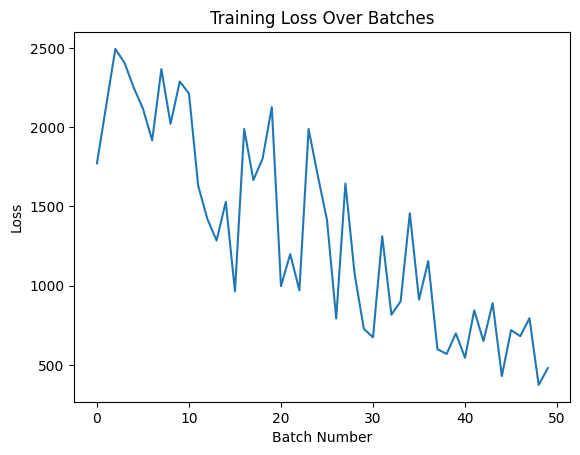

In [11]:
plt.plot(train_losses)
plt.title('Training Loss Over Batches')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.show()

The overall downward trend means the training is working and the model is learning.

The noise (spikes) is expected in batch-level loss, the important thing is the general decline over time.

If this were flat or going up, it would mean the model isn’t improving.